In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
import scipy as sp
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 1. iris 데이터셋의 구조(structure)와 변수의 자료형(type)을 확인해 보세요

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### 2. sepal_width(꽃받침 너비) 열의 데이터 평균과 표준편차 그리고 3사분위수를 구해보세요.

In [12]:
iris['sepal_width'].mean()    ## 평균

np.float64(3.0573333333333337)

In [13]:
iris['sepal_width'].std()     ## 표준편차

np.float64(0.4358662849366982)

In [14]:
iris['sepal_width'].quantile(0.75)    ## 3사분위수

np.float64(3.3)

In [ ]:
iris['sepal_width'].median()    ## 중간값, 중위수

np.float64(3.0)

In [ ]:
iris['sepal_width'].max()       ## 최대값

np.float64(4.4)

In [20]:
iris['sepal_width'].min()       ## 최소값

np.float64(2.0)

In [21]:
iris[['sepal_width', 'sepal_length']].min()       ## 최소값

sepal_width     2.0
sepal_length    4.3
dtype: float64

In [18]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### 3. sepal_width 열의 데이터 분포를 히스토그램으로 나타내 보세요

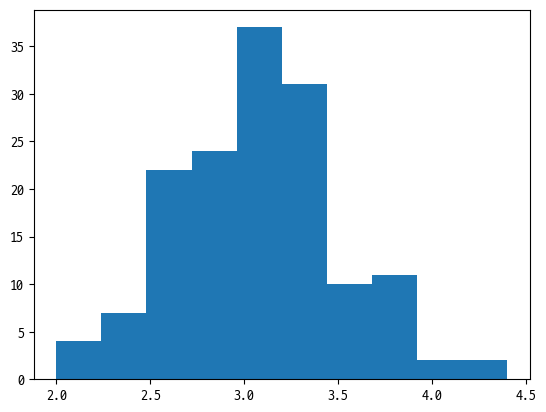

In [22]:
plt.hist(iris.sepal_width)
plt.show()

##### 4. 붓꽃 품종별(species) sepal_width의 분포를 나타내 보세요. (박스플롯)

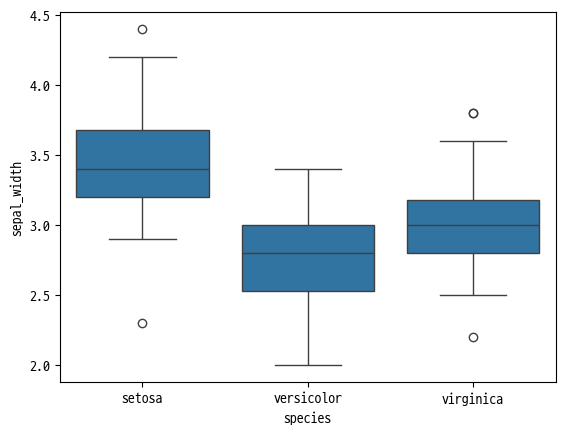

In [23]:
sns.boxplot(y = 'sepal_width', x = 'species', data = iris)
plt.show()

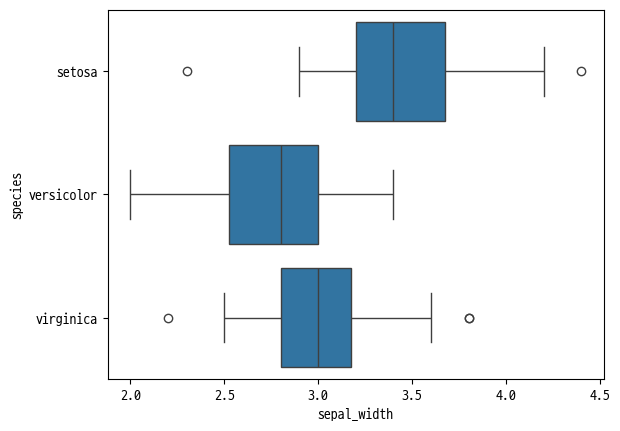

In [25]:
sns.boxplot(x = 'sepal_width', y = 'species', data = iris)
plt.show()

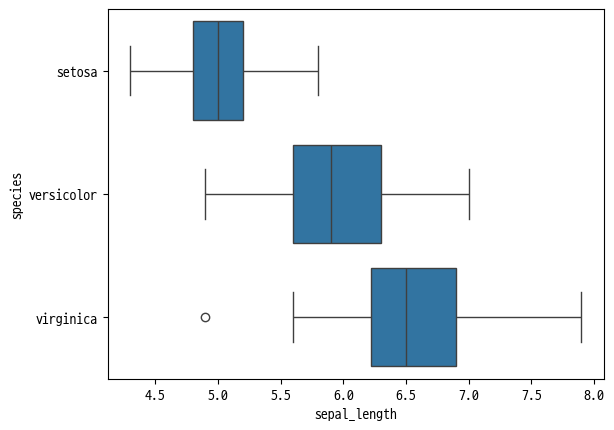

In [27]:
sns.boxplot(x = 'sepal_length', y = 'species', data = iris)
plt.show()

##### 5-1. setosa 품종의 sepal_width만 필터링해서 s라는 데이터 셋을 만들기

In [37]:
s = iris.loc[iris.species=='setosa', 'sepal_width']
s.head(3)

0    3.5
1    3.0
2    3.2
Name: sepal_width, dtype: float64

#### 5-2 versicolor 품종의 sepal_width만 필터링해서 v라는 데이터 셋을 만들기

In [38]:
v = iris.loc[iris.species=='versicolor', 'sepal_width']
v.head(3)

50    3.2
51    3.2
52    3.1
Name: sepal_width, dtype: float64

##### 6. s와 v가 정규 분포를 따르는지 검정해보세요

In [ ]:
sp.stats.shapiro(s)     ## 샤피로-윌크 검정

## pvalue가 0.05보다 크므로, s는 정규분포를 따른다(귀무가설: 정규분포를 이루고 있다) 귀무가설 체택

ShapiroResult(statistic=np.float64(0.9717195199560363), pvalue=np.float64(0.27152639563455816))

In [ ]:
sp.stats.shapiro(v)     ## 샤피로-윌크 검정

## pvalue가 0.05보다 크므로, s는 정규분포를 따른다(귀무가설: 정규분포를 이루고 있다) 귀무가설 체택

ShapiroResult(statistic=np.float64(0.9741332819702798), pvalue=np.float64(0.3379951061741378))

#### 7. 데이터셋 s와 v의 평균이 같다고 불 수 있는지 t-test를 통해 검정해 보세요

In [ ]:
sp.stats.ttest_ind(s, v)

## pvalue가 0.05보다 작으므로, 귀무가설(s, v의 평균은 같다)를 기각한다. 따라서 귀무가설 채택(평균은 다르다)
## setosa라는 품종과 versicolor라는 품종의 "sepal_width" 항목의 평균은 서로 다르다

TtestResult(statistic=np.float64(9.454975848128596), pvalue=np.float64(1.8452599454769322e-15), df=np.float64(98.0))